## 1. Insights

The main objective of this project is to provide a data driven approach to compare the volume of positive and negative news as tweeted by 5 major news outlets, namely CBS. CNN, BBC, Fox News and New York Times.
The data utilized in this analysis work is obtained by Twitter API on 06.14.2018 17:10 (UTC). The sentiments of tweets are estimated by 

The scatter plot, printing out the sentiment polarity scores of the last 1000 news trends tweeted by the news outlets, is drawn to visualize the distribution of positive, negative and neutral sentiment scores. By investigating the scatter plot and the polarity scores, it can be seen that the most of the polarity scores of CBS and BBC are accumulated at the upper side of the graph suggesting outnumbered positive trends  compared to the negative trends in these two news outlets. On other hand, the polarity scores of CNN and Fox News are evenly distributed across the both sides of graph and the polarity scores of New York times are mostly scattered along the neutral axis (x-axis). These observations offer an overall neutral polarity for CNN, Fox News and New York Times. 

The bar plot, revealing the percentage average sentiment polarity scores, is drawn to provide an overall sentimental picture of their recent tweeted news. The average polarity scores were found as 14%, 35%, 2%, 1% and 0% for CBS, CNN, BBC, Fox News and New York Times respectively. These results here are in parallel with previous observations made in the scatter plot as indicates a higher volume of positive news trends for BBC and CBS while about even or neutral news volumes for CNN, Fox News and New York Times.


## 2. Implementation


### 2.1. Import dependecies

In [1]:

import os, sys, inspect
import time
import numpy as np
import pandas as pd
import matplotlib as mpl

# add parent dir to system dir
currdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
rootdir = os.path.dirname(currdir)
sys.path.insert(0, rootdir)

from newssentiment import TweetSentiments
from newssentiment.plot import Scatter
from newssentiment.plot import Bar


### 2.2. Setup run parameters

In [2]:

# set number of query tweets 
n_tweets = 1000
# set query outlets
outlets = ["@BBC", "@CBS", "@CNN", "@FoxNews", "@nytimes"]
colors = ["red", "green", "gold", "blue", "gray"] 
# set path to save figures
path_fig = os.path.join(rootdir, "reports", "figures")
path_log = os.path.join(rootdir, "reports", "logs")
# set true to save figures
save_fig = True
# set true to save results to csv
save_csv = True
# set true to log print
verbose = True
mpl.rcParams['figure.dpi'] = 150
mpl.rcParams['savefig.dpi'] = 150

In [3]:
# get/format current time
currtime = time.gmtime()
currtimestr = time.strftime("'%Y-%m-%d %H:%M (UTC)'", currtime) 


###  2.3. Get media tweets sentiments


In [4]:
sentiment = TweetSentiments(n_tweets=n_tweets)
df = sentiment.get_scores(queries=outlets)
df.head(10)

,Outlet,Date,Positive,Negative,Neutral,Compound,Tweets Ago
0,@BBC,Thu Jun 14 16:00:21 +0000 2018,0.137,0.863,0.000,0.2263,0
1,@BBC,Thu Jun 14 15:13:23 +0000 2018,0.127,0.719,0.154,-0.2023,1
2,@BBC,Thu Jun 14 13:10:42 +0000 2018,0.203,0.642,0.155,-0.0258,2
3,@BBC,Thu Jun 14 13:01:07 +0000 2018,0.155,0.845,0.000,0.5410,3
4,@BBC,Thu Jun 14 12:24:25 +0000 2018,0.231,0.681,0.088,0.3774,4
5,@BBC,Thu Jun 14 12:11:30 +0000 2018,0.000,0.902,0.098,-0.3400,5
6,@BBC,Thu Jun 14 12:01:05 +0000 2018,0.192,0.808,0.000,0.4753,6
7,@BBC,Thu Jun 14 11:00:18 +0000 2018,0.264,0.597,0.138,0.6124,7
8,@BBC,Thu Jun 14 08:01:02 +0000 2018,0.000,1.000,0.000,0.0000,8
9,@BBC,Thu Jun 14 07:27:04 +0000 2018,0.000,1.000,0.000,0.0000,9



### 2.4. Save score data

In [5]:
if save_csv:
    t = time.strftime("%Y-%m-%d-%H-%M", currtime) 
    df.to_csv(os.path.join(path_log, f"outlets-tweets-scores-{t}.csv"))


### 2.5. Scatter plot

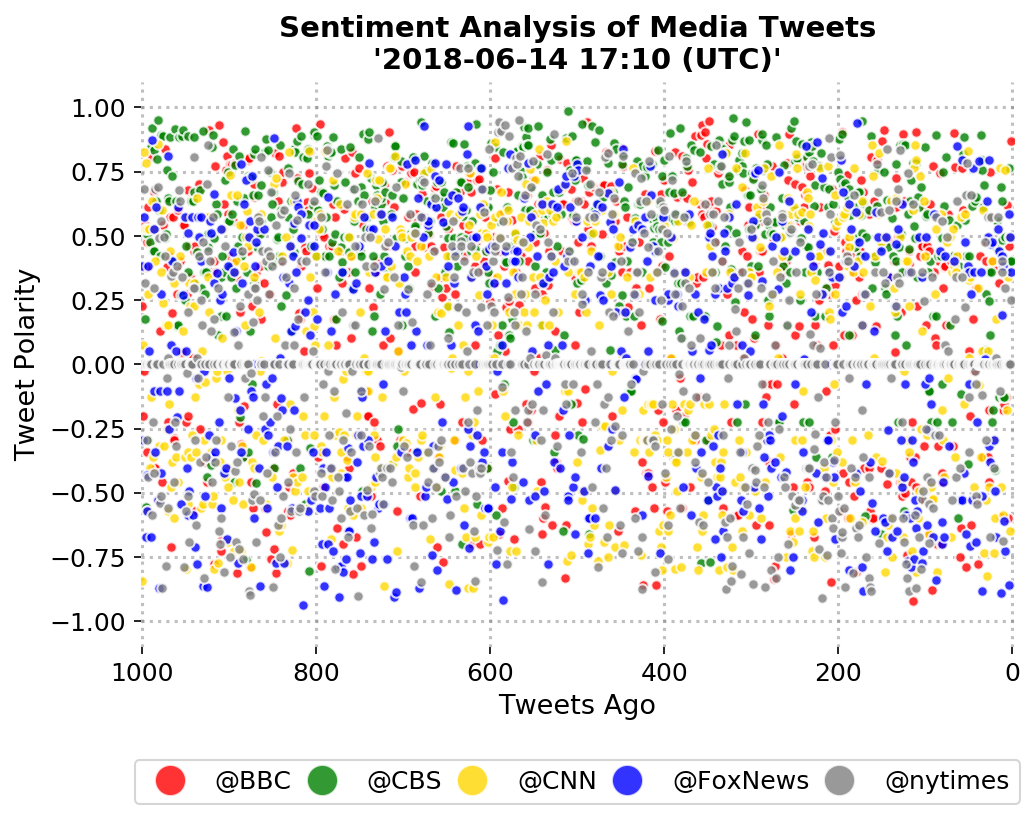

In [6]:
# time
x = df["Date"].map(lambda d: pd.to_datetime(d))[0:n_tweets]
x = np.linspace(n_tweets, 1, n_tweets)
title = f"Sentiment Analysis of Media Tweets" + os.linesep + f"{currtimestr}"

scatter = Scatter()
scatter.figsize = (8, 6)
scatter.dpi = 50
scatter.markersize = 5
scatter.markeredgewidth = 1
scatter.markeredgecolor = "white"
scatter.alpha = 0.8
scatter.xlim = [n_tweets+2, -2]
scatter.ylim = [-1.1, 1.1]
scatter.xlabel = "Tweets Ago"
scatter.ylabel = "Tweet Polarity"
scatter.title = title
# scatter.fig.patch.set_visible(False)
scatter.ax.spines['top'].set_visible(False)
scatter.ax.spines['right'].set_visible(False)
scatter.ax.spines['bottom'].set_visible(False)
scatter.ax.spines['left'].set_visible(False)

for outlet, color in zip(outlets, colors):
    scatter.markerfacecolor = color
    scatter.label = outlet
    outlet_compound_score = df["Compound"][df["Outlet"] == outlet]
    n_outlet_tweets = outlet_compound_score.shape[0]
    tweets_index = np.linspace(n_outlet_tweets, 1, n_outlet_tweets)
    scatter(tweets_index, outlet_compound_score)
scatter.ax.legend(loc="lower center",
                  bbox_to_anchor=(0.5, -0.3),
                  ncol=5,
                  markerscale=3,
                  fontsize=12,
                  columnspacing=0.2)

if save_fig:
    t = time.strftime("%Y-%m-%d-%H-%M", currtime) 
    scatter.fig.savefig(os.path.join(path_fig, f"compound-scatter-{t}"),
                        transparent=False, bbox_inches="tight")

### 2.6. Overall sentiments

In [7]:
# get overall average scores
gdf = df.groupby("Outlet")
mean_df = pd.DataFrame(gdf["Compound"].mean())
mean_df

,Compound
Outlet,
@BBC,0.141913
@CBS,0.349019
@CNN,0.020110
@FoxNews,0.007299
@nytimes,0.003353


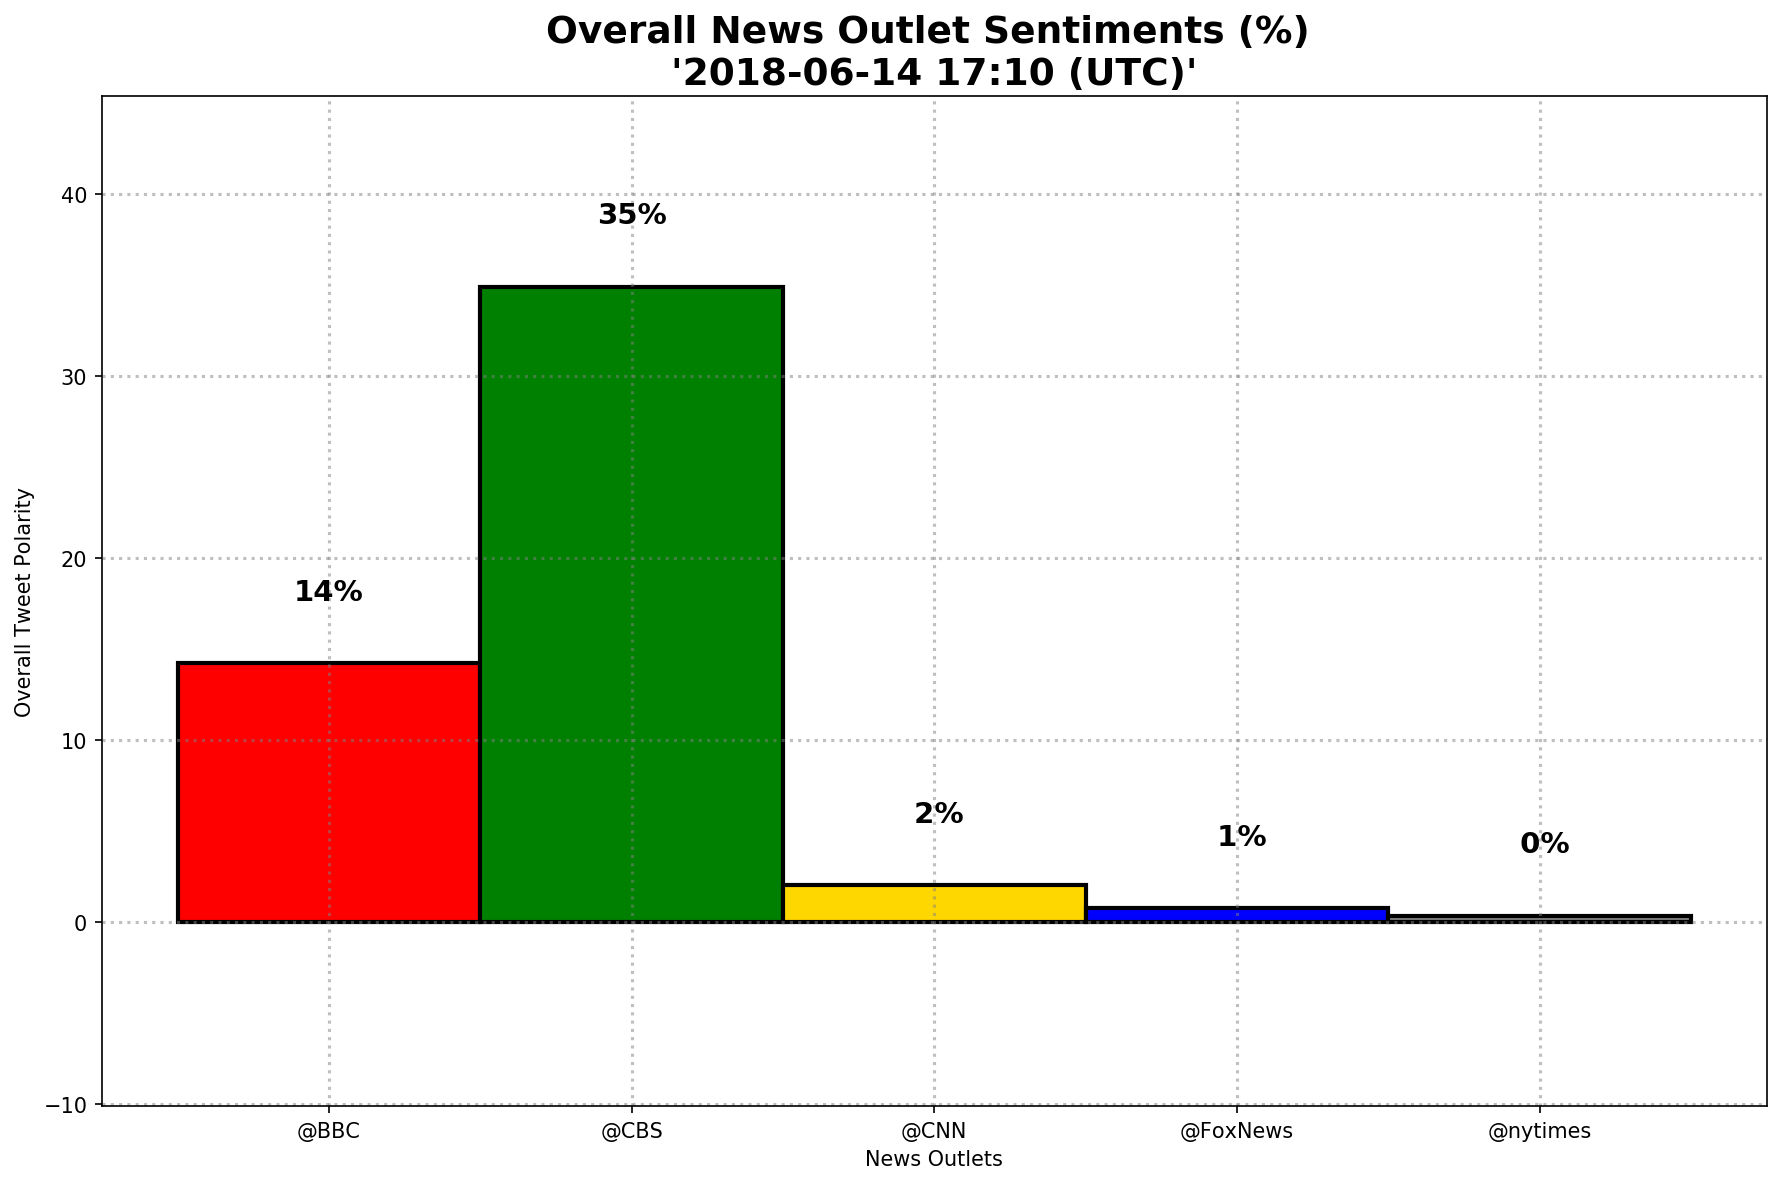

In [8]:
x = mean_df.index.values
y = mean_df["Compound"].values * 100
ylabel = "Overall Tweet Polarity"
xlabel = "News Outlets"
title = f"Overall News Outlet Sentiments (%) " + os.linesep + f"{currtimestr}"

bar = Bar()
bar.xlabelfontsize = 18
bar.titlefontsize = 18
bar.title = title
bar.ylabel = ylabel
bar.xlabel = xlabel
bar.alpha = 0.8
bar.label = True
bar.labelformat = "{:2.0f}%"
bar(x=x, y=y, colors=colors) 

if save_fig:
    t = time.strftime("%Y-%m-%d-%H-%M", currtime)
    bar.fig.savefig(os.path.join(path_fig, f"sentiments-barchart-{t}"),
                        transparent=False, bbox_inches="tight")
